CUSTOMER CONVERSION PREDICTION 

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [66]:
df=pd.read_csv("/content/train.csv")

In [67]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [6]:
print(df.shape)

(45211, 11)


In [7]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [68]:
df = df.drop_duplicates()
df.shape

(45205, 11)

In [69]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [70]:
df.describe()

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.000000,45205.000000
mean,40.937087,15.80688,258.183055,2.763898
std,10.619130,8.32234,257.538504,3.098189
min,18.000000,1.00000,0.000000,1.000000
25%,33.000000,8.00000,103.000000,1.000000
50%,39.000000,16.00000,180.000000,2.000000
75%,48.000000,21.00000,319.000000,3.000000
max,95.000000,31.00000,4918.000000,63.000000


In [71]:
df["call_type"].value_counts()

cellular     29282
unknown      13017
telephone     2906
Name: call_type, dtype: int64

In [72]:
df["y"].value_counts()

no     39916
yes     5289
Name: y, dtype: int64

[]

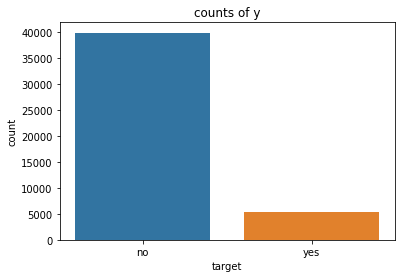

In [73]:
sns.countplot(x=df.y,data=df)
plt.xlabel("target")
plt.title("counts of y")
plt.plot()

In [74]:
df["job"].value_counts()

blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [75]:
df["job"]=df["job"].replace("unknown",np.nan)

In [76]:
df["marital"].value_counts()

married     27210
single      12788
divorced     5207
Name: marital, dtype: int64

In [77]:
df["education_qual"].value_counts()

secondary    23199
tertiary     13299
primary       6850
unknown       1857
Name: education_qual, dtype: int64

In [78]:
df["education_qual"]=df["job"].replace("unknown",np.nan)

In [79]:
df["call_type"].value_counts()

cellular     29282
unknown      13017
telephone     2906
Name: call_type, dtype: int64

In [80]:
df["day"].value_counts()

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1840
28    1829
7     1817
19    1756
29    1745
15    1703
12    1603
13    1585
30    1566
9     1560
11    1479
4     1445
16    1415
2     1292
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

In [82]:
df["mon"].value_counts()

may    13765
jul     6894
aug     6245
jun     5339
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

In [83]:
df["dur"].value_counts()

124     187
90      184
89      177
104     175
122     175
       ... 
1833      1
1545      1
1352      1
1342      1
1556      1
Name: dur, Length: 1573, dtype: int64

In [84]:
df["num_calls"].value_counts()

1     17542
2     12503
3      5521
4      3520
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
25       22
23       22
24       20
29       16
28       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
37        2
50        2
41        2
46        1
58        1
55        1
63        1
51        1
39        1
44        1
Name: num_calls, dtype: int64

In [85]:
df["prev_outcome"].value_counts()

unknown    36953
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [86]:
df.isnull().sum()

age                 0
job               288
marital             0
education_qual    288
call_type           0
day                 0
mon                 0
dur                 0
num_calls           0
prev_outcome        0
y                   0
dtype: int64

In [87]:
df["education_qual"]= df["education_qual"].fillna("secondary")

In [88]:
df["education_qual"].value_counts()

blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
secondary         288
Name: education_qual, dtype: int64

In [28]:
dataset.isnull().sum()

age                 0
job               288
marital             0
education_qual      0
call_type           0
day                 0
mon                 0
dur                 0
num_calls           0
prev_outcome        0
y                   0
dtype: int64

In [89]:
df.dropna(subset=["job"],inplace=True)

In [90]:
df.shape

(44917, 11)

In [31]:
import warnings
warnings.filterwarnings("ignore")

In [91]:
df["target"]=dataset["y"].map({"yes":1,"no":0})

In [92]:
df.groupby("prev_outcome")["target"].mean()

prev_outcome
failure    0.125384
other      0.166485
success    0.646000
unknown    0.091776
Name: target, dtype: float64

In [93]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58,management,married,management,unknown,5,may,261,1,unknown,no,0
1,44,technician,single,technician,unknown,5,may,151,1,unknown,no,0
2,33,entrepreneur,married,entrepreneur,unknown,5,may,76,1,unknown,no,0
3,47,blue-collar,married,blue-collar,unknown,5,may,92,1,unknown,no,0
5,35,management,married,management,unknown,5,may,139,1,unknown,no,0


EXPLORATORY DATA ANALYSIS

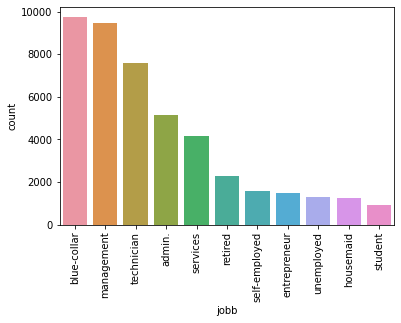

In [94]:
df_i= pd.DataFrame(df.job.value_counts()).sort_values("job",ascending=False).reset_index()
df_i.rename(columns= {"index":"jobb","job":"count"},inplace=True)
bar = sns.barplot(x=df_i["jobb"],y=df_i["count"],data=df_i)
bar.tick_params(axis="x",rotation=90)

<AxesSubplot:ylabel='job'>

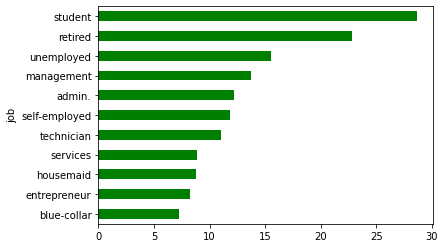

In [96]:
(df.groupby("job")["target"].mean()*100).sort_values().plot(kind="barh",color="green")

<AxesSubplot:ylabel='education_qual'>

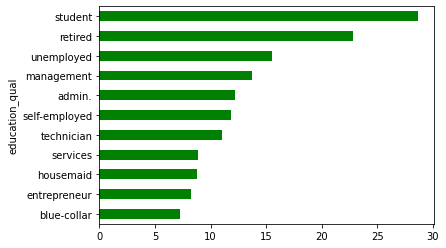

In [97]:
(df.groupby("education_qual")["target"].mean()*100).sort_values().plot(kind="barh",color="green")

<AxesSubplot:ylabel='call_type'>

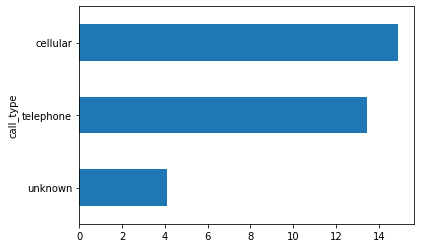

In [98]:
(df.groupby("call_type")["target"].mean()*100).sort_values().plot(kind="barh")

<AxesSubplot:ylabel='prev_outcome'>

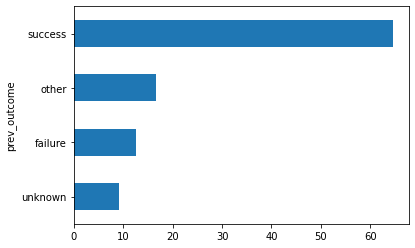

In [99]:
(df.groupby("prev_outcome")["target"].mean()*100).sort_values().plot(kind="barh")

<AxesSubplot:ylabel='mon'>

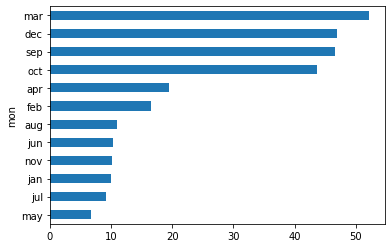

In [49]:
(dataset.groupby("mon")["target"].mean()*100).sort_values().plot(kind="barh")

<AxesSubplot:ylabel='marital'>

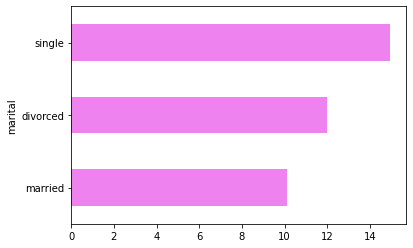

In [100]:
(df.groupby("marital")["target"].mean()*100).sort_values().plot(kind="barh",color="violet")

<AxesSubplot:ylabel='day'>

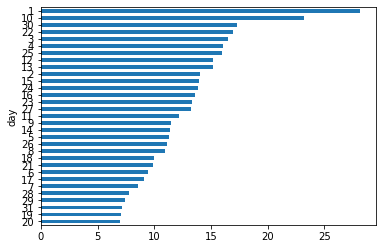

In [101]:
(df.groupby("day")["target"].mean()*100).sort_values().plot(kind="barh")

<AxesSubplot:ylabel='call_type'>

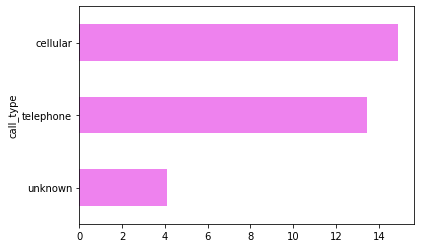

In [103]:
(df.groupby("call_type")["target"].mean()*100).sort_values().plot(kind="barh",color="violet")

Data Encoding


In [107]:
col=df["job"].unique()
p=[]
for i in col:
  p=len(df[df["job"]==i][df["y"]=="yes"])/len(df[df["job"]==i])
  p.append(p)
  dff=pd.DataFrame({"job":col,"%":p})
  dff=dff.sort_values("%",ascending=True)
  dff=dff.reset_index()
  del dff["index"]

AttributeError: ignored

In [108]:
dff

NameError: ignored

In [ ]:
df["job"]=df["job"].map({dff["job"][0]:0,})

SPLITTING THE DATA

In [120]:
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 7)

NameError: ignored

In [ ]:
 from sklearn.scale import StandardScaler
scaler = StandardScaler()
 scaler.fit(X_train)
 X_train = scaler.transform(X_train)


 X_test = scaler.transofrm(X_test)



Balancing dataset using SMOTEENN

In [121]:
df.shape

(44917, 12)

In [113]:
len(x_train),len(y_train)


NameError: ignored

In [114]:
from imblearn.combine import SMOTEENN
smt=SMOTEENN(sampling_strategy="all")
x_smt,y_smt =smt.fit_resample(x_train,y_train)


NameError: ignored

In [115]:
len(x_smt),len(y_smt)

NameError: ignored

In [116]:
df_bal=pd.DataFrame(x_smt,columns=df.columns[:-2])

NameError: ignored

In [ ]:
df_bal["y"]=y_smt

In [ ]:
len(df_bal[df_bal["y"]==1])/len(df_bal)

MODEL: LOGISTIC REGRESSION

In [ ]:
from sklearn.model_selection import train_test_split # split the data

from sklearn import metrics # evaluation metrics

In [ ]:
from sklearn.linear_model import LogisticRegression 
logistic_regression= LogisticRegression() 
logistic_regression.fit(X_train,y_train) 
y_pred=logistic_regression.predict(X_test)

logistic_regression.coef_
y_pred

In [ ]:
logistic_regression.predict_proba(X_test)

In [ ]:
logistic_regression.coef_

In [ ]:
logistic_regression.intercept_

In [ ]:
from sklearn.metrics import accuracy_score, plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score
logistic_regression.score(X_test,y_test) # accuracy
confusion_matrix(y_test,y_pred)
f1_score(y_test,y_pred)
logistic_regression.score(X_test,y_test)
plot_roc_curve(logistic_regression, X_test, y_test)
accuracy_score(y_test,y_pred)

MODEL:KNN


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets, neighbors
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import train_test_split

In [117]:
def knn_comparison(data, k): 
  x = data[['X','Y']].values 
  y = data['class'].astype(int).values  
  x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)

  from sklearn.preprocessing import StandardScaler
  scaler = StandardScaler()
  x_train = scaler.fit_transform(x_train)
  x_test = scaler.transform(x_test)

  knn = KNeighborsClassifier(n_neighbors=k) 
  knn.fit(x_train, y_train) 
  print("Train Accuracy : ", knn.score(x_train,y_train)) 
  print("Val Accuracy : ", np.mean(cross_val_score(knn, x_train, y_train, cv=10)))
  plot_decision_regions(x_train, y_train, clf = knn, legend=2) 
  
  plt.xlabel('X') 
  plt.ylabel('Y') 
  plt.title('Knn with K='+ str(k)) 
  plt.show()  


In [119]:
from sklearn.model_selection import cross_val_score
data = pd.read_csv('train.csv')
x = data[['X','Y']].values
y = data['class'].astype(int).values
for k in [1,2,3,4,5,6,7,8,9,10,20,40,80]:
  clf = KNeighborsClassifier(n_neighbors=k)
  clf.fit(x,y)
  print("K value : ", k, " train score : ", clf.score(x,y) , " test score : ", cross_val_score(clf,x,y,cv = 10, scoring = 'accuracy').mean())

KeyError: ignored

MODEL:DECISION TREE


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 7)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train) 


y_pred = dt.predict(X_test)
y_pred


In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
y_pred = dt.predict(X_test) 
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))
acc = roc_auc_score(y_test, y_pred)
print("Test set auc: {:.2f}".format(acc))
plot_roc_curve(dt, X_test, y_test)


RANDOM FOREST

In [ ]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split

original_features = pd.read_csv('train.csv') 
print(original_features.columns)
original_features

original_features.isnull().sum()
original_features = original_features.drop_duplicates()
original_features.dtypes
# # # To check all the problem with data
del original_features['age']
original_features



In [ ]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rf = RandomForestRegressor(n_estimators= 100, max_depth = 3, max_features='sqrt')
rf.fit(original_train_features, original_train_labels);
predictions = rf.predict(original_test_features
errors = abs(predictions - original_test_labels)
 print('MAE :', round(np.mean(errors), 2), 'degrees'.
 improvement_baseline = 100 * abs(np.mean(errors) - np.mean(baseline_errors)) / np.mean(baseline_errors)
 print('Improvement over baseline:', round(improvement_baseline, 2), '%.')

r2_score(baseline_preds, original_test_labels)
r2_score(predictions, original_test_labels)

XG BOOST


In [ ]:
x_train = original_train_features
y_train = original_train_labels
x_test = original_test_features
y_test = original_test_labels
x_train

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(x_train,y_train) 
  model.score(x_test, y_test) 
  print("Learning rate : ", lr, " Train score : ", model.score(x_train,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, x_train, y_train, cv=10)))

In [ ]:
model = xgb.XGBRegressor(learning_rate = 0.05, n_estimators=100)
model.fit(x_train,y_train) 
model.score(x_test, y_test)

In [ ]:
from sklearn.ensemble import VotingRegressor # this is the function that ensembles my model
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor

model1 = LinearRegression()
model2 = tree.DecisionTreeRegressor(random_state=1)
model3 = KNeighborsRegressor(3)
model = VotingRegressor(estimators=[('lr', model1), ('dt', model2),('knn',model3)]) # it will stitich all the models together, voting = hard means max voting 
model.fit(x_train,y_train)
model.score(x_test,y_test)